In [1]:
from astroquery.utils.tap.core import TapPlus
from astroquery.gaia import Gaia
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append('../../')

from astroLuSt.database_interface import alerceinterface as aldiai
from astroLuSt.database_interface import database_utils as aldidu
from astroLuSt.database_interface import eleanorinterface as aldiei
from astroLuSt.database_interface import gaiainterface as aldigi
from astroLuSt.database_interface import simbadinterface as aldisi

importlib.reload(aldiai)
importlib.reload(aldidu)
importlib.reload(aldiei)
importlib.reload(aldigi)
importlib.reload(aldisi)

#style for plotting
plt.style.use('astroLuSt.styles.LuSt_style')



In [2]:
targets = [
    'KIC 5006817', 'RR Lyr', 'TV Boo', 'KIC 5006817',
    'TIC 100015323'
]

# AlerceDatabaseInterface

AlerceDatabaseInterface(
    n_jobs=1,
    sleep=0.002,
    verbose=0,
)


,oid_ztf,ndethist_ztf,ncovhist_ztf,mjdstarthist_ztf,mjdendhist_ztf,corrected_ztf,stellar_ztf,ndet_ztf,g_r_max_ztf,g_r_max_corr_ztf,...,dej2000_ztf,sigmara_ztf,sigmadec_ztf,class_ztf,classifier_ztf,probability_ztf,step_id_corr_ztf,id,ra,dec
0,ZTF19acduwin,2225,4501,58095.129444,60450.478206,True,False,215,0.1117,-0.045019,...,27.022043,0.018363,0.016358,None,None,None,24.4.1,10054,12.39495833,27.02213889
1,ZTF22abbjfyk,16,2921,58457.250000,59810.500000,True,True,2,NaN,NaN,...,27.022294,0.000255,0.000179,None,None,None,dev,10054,12.39495833,27.02213889
2,ZTF18abtyqxq,2614,5132,58095.129444,60614.425417,True,False,1362,NaN,NaN,...,27.022056,0.028075,0.025010,None,None,None,24.5.2a6,10054,12.39495833,27.02213889
3,ZTF17aabulmo,430,2268,58095.130093,60609.257627,True,False,280,NaN,NaN,...,34.218369,0.039303,0.032500,None,None,None,24.5.2a6,object3,16.294625,34.21841667
4,ZTF20aaeaiom,994,3031,58305.500000,59984.250000,True,False,115,0.4762,0.375844,...,41.488621,0.000140,0.000098,None,None,None,1.1.6,10147,359.6756667,41.48880556
5,ZTF18aceudwl,1546,3458,58302.500000,60150.500000,True,False,38,0.6445,0.345807,...,41.488784,0.000067,0.000114,None,None,None,1.2.0,10147,359.6756667,41.48880556
6,ZTF20acuuugt,2005,3389,58101.250000,60085.500000,True,False,132,1.0293,0.535156,...,41.488633,0.000117,0.000099,None,None,None,1.2.0,10147,359.6756667,41.48880556


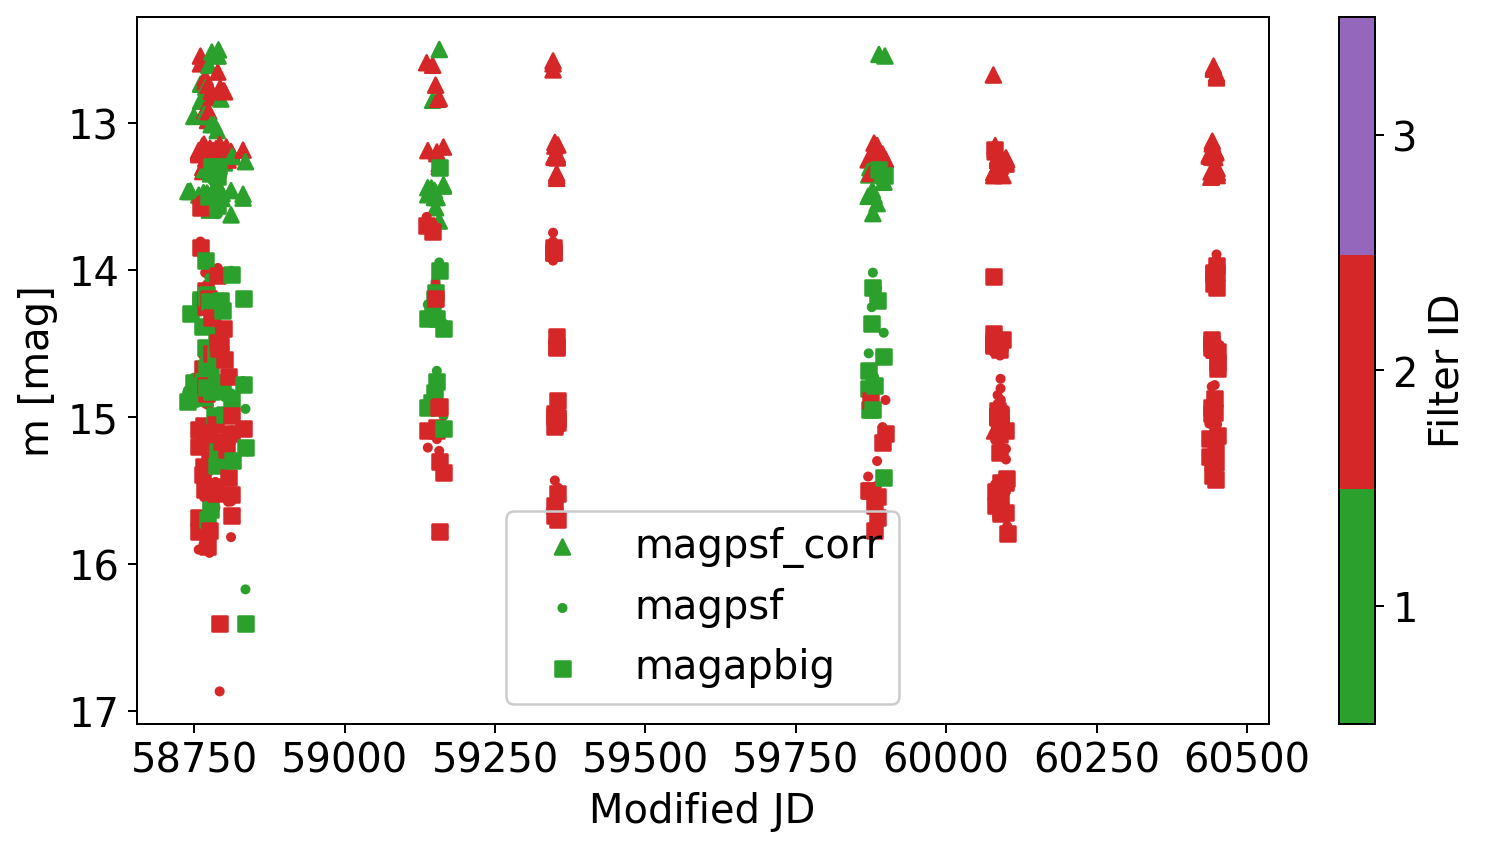

In [3]:
importlib.reload(aldiai)

ADI = aldiai.AlerceDatabaseInterface(
    sleep=2e-3,
    n_jobs=1,
    verbose=0,
)
print(ADI)

df = pd.DataFrame(
    data=np.array([
        [10054,	12.39495833, 27.02213889,],
        ["object2",	353.7751667, np.inf,],#41.10291667,],   #NOTE: ill fail
        ["object3",	16.294625,	 34.21841667,],
        [10147,	359.6756667, 41.48880556,],
    ]),
    columns=['id', 'ra', 'dec']
)

df_ztf = ADI.crossmerge_by_coordinates(
    df_coords=df,
    ra_colname='ra', dec_colname='dec', radius=1,
    sleep=None,
    n_jobs=None,
    verbose=None,
    parallel_kwargs=None,
)
display(df_ztf)
# display(ADI.LE.df_errorlog)   #failed extractions

dfs_lc = ADI.download_lightcurves(
    ztf_ids=list(df_ztf['oid_ztf']) + ["ZTF1"], #"ZTF1" will fail
    # save=False,
    save='../_data/',
    redownload=True,
    sleep=None,
    n_jobs=None,
    verbose=None,
    parallel_kwargs=None,
)
# display(ADI.LE.df_errorlog.query("suffix == 'download_one'"))   #failed extractions

fig, axs = ADI.plot_result(dfs_lc[0])


# SimbadDatabaseInterface
* Use [`pd.Series.str.extractall()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extractall.html#pandas.Series.str.extractall) to extract relevant ids

In [4]:
importlib.reload(aldisi)

SDI = aldisi.SimbadDatabaseInterface(
    npartitions=3,      #use to specify number of partitions
    nperpartition=3,    #use to specify number of samples per partitino
    n_jobs=1, simbad_timeout=120,
    verbose=3
)

df_ids = SDI.get_ids(
    input_ids=targets,
    npartitions=None,
    n_jobs=None,
    simbad_timeout=None,
    verbose=None,
    parallel_kwargs=None,
    query_tap_kwargs=None,
)
display(df_ids)


#extract relevant IDs
df_ids_sep = df_ids['ids'].str.extractall(pat=(
    r'(?P<id_gaiadr3>Gaia DR3[^|\n]+)'
    r'|(?P<id_gaiadr2>Gaia DR2[^|\n]+)'
    r'|(?P<id_apogee>AP[^|\n]+)'
    r'|(?P<id_tic>TIC[^|\n]+)'
)).groupby(level=0).first()

display(df_ids_sep)

INFO(get_ids): Working on parition 1/2 (3 samples)
INFO(get_ids): Working on parition 2/2 (2 samples)


,input_id,main_id,ids,ra,dec
0,KIC 5006817,KIC 5006817,AP J19214942+4008446|Gaia DR3 2101103743584479...,290.455967,40.145732
1,RR Lyr,V* RR Lyr,HIP 95497|AP J19252793+4247040|Gaia DR3 212598...,291.366304,42.784359
2,TV Boo,V* TV Boo,HIP 69759|AP J14163658+4221356|Gaia DR3 149223...,214.152423,42.359920
3,KIC 5006817,KIC 5006817,AP J19214942+4008446|Gaia DR3 2101103743584479...,290.455967,40.145732
4,TIC 100015323,TIC 100015323,TIC 100015323|Gaia DR3 4959612046243236864|TYC...,23.185169,-42.997902


,id_gaiadr3,id_gaiadr2,id_apogee,id_tic
0,Gaia DR3 2101103743584479744,Gaia DR2 2101103739284386688,AP J19214942+4008446,TIC 122447138
1,Gaia DR3 2125982599343482624,Gaia DR2 2125982599341232896,AP J19252793+4247040,TIC 159717514
2,Gaia DR3 1492230556717187456,Gaia DR2 1492230556717187456,AP J14163658+4221356,TIC 168709463
3,Gaia DR3 2101103743584479744,Gaia DR2 2101103739284386688,AP J19214942+4008446,TIC 122447138
4,Gaia DR3 4959612046243236864,Gaia DR2 4959612046243236864,None,TIC 100015323


# EleanorDatabaseInterface

In [5]:
importlib.reload(aldiei)

EDI = aldiei.EleanorDatabaseInterface(
    sleep=0,
    n_jobs=3,
    metadata_path="../mastDownload/HLSP",
    clear_metadata=False,
    redownload=True,
    verbose=3,
)

tics = df_ids_sep["id_tic"].to_list()

lcs, metas, tpfs, aperture_masks = EDI.download(
    sectors="all",
    source_ids=[{'tic':tic[4:]} for tic in tics[:]],
    # source_ids=[{'tic':'234507163'},{'gaia': '2249474965068982272'}],
    # source_ids=[{'gaia': '2249474965068982272'}, {'gaia': '114797397716085120'}],
    get_normalized_flux=True, normfunc=lambda x, datum: x/np.nanmedian(x[datum.quality == 0]),
    tpfs2store=slice(1), store_aperture_masks=True,
    # tpfs2store=None, store_aperture_masks=True,
    n_chunks=1,
    # targetdata_kwargs=dict(do_pca=True, aperture_mode='small'),
    targetdata_kwargs=dict(do_pca=True),
    # custom_aperture_kwargs=dict(shape='rectangle', h=3, w=4), #in case you want to use a custom aperture
    # save_kwargs=dict(directory='./data/', pd_savefunc='to_parquet', store_metadata=True),
    save_kwargs=dict(directory=None, pd_savefunc='to_parquet', store_metadata=True),
)


INFO(EleanorDatabaseInterface.download()): Extracting chunk 1/1 (5/5)


[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


Found star in Sector(s) 16 23 49 50
Found star in Sector(s) 14 40 41 54 55
Found star in Sector(s) 14 40 41 54 55


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:856: RuntimeWarning: invalid value encountered in divide
  bkgvar = np.nanstd(self.bkg_tpf, axis=(1,2))/(np.nansum(self.bkg_tpf, axis=(1,2)))
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/pyt

No eleanor postcard has been made for your target (yet). Using TessCut instead.


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targe

No eleanor postcard has been made for your target (yet). Using TessCut instead.


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targe

No eleanor postcard has been made for your target (yet). Using TessCut instead.
{'tic': '159717514'}
Traceback (most recent call last):
  File "/home/lukas/github/astroLuSt/demos/database_interface/../../astroLuSt/database_interface/eleanorinterface.py", line 364, in extract_source
    datum = eleanor.TargetData(source=s, **targetdata_kwargs)
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py", line 193, in __init__
    self.ffiindex = self.post_obj.ffiindex
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/postcard.py", line 351, in ffiindex
    A = np.loadtxt(eleanorpath + '/metadata/s{0:04d}/cadences_s{0:04d}.txt'.format(sector))
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/npyio.py", line 1373, in loadtxt
    arr = _read(fname, dtype=dtype, comment=comment, delimiter=delimiter,
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/npyio.py", line 992, in _read
    fh = np.l

/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py:1240: RuntimeWarning: invalid value encountered in divide
  tmp_flux[:] /= savgol_filter(tmp_flux, 101, 2)
/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targe

No eleanor postcard has been made for your target (yet). Using TessCut instead.
{'tic': '122447138'}
Traceback (most recent call last):
  File "/home/lukas/github/astroLuSt/demos/database_interface/../../astroLuSt/database_interface/eleanorinterface.py", line 364, in extract_source
    datum = eleanor.TargetData(source=s, **targetdata_kwargs)
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py", line 193, in __init__
    self.ffiindex = self.post_obj.ffiindex
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/postcard.py", line 351, in ffiindex
    A = np.loadtxt(eleanorpath + '/metadata/s{0:04d}/cadences_s{0:04d}.txt'.format(sector))
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/npyio.py", line 1373, in loadtxt
    arr = _read(fname, dtype=dtype, comment=comment, delimiter=delimiter,
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/npyio.py", line 992, in _read
    fh = np.l

Found star in Sector(s) 14 40 41 54 55


No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.


[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:   30.6s remaining:   45.8s


Found star in Sector(s) 2 3 29 30
No eleanor postcard has been made for your target (yet). Using TessCut instead.


No eleanor postcard has been made for your target (yet). Using TessCut instead.
{'tic': '122447138'}
Traceback (most recent call last):
  File "/home/lukas/github/astroLuSt/demos/database_interface/../../astroLuSt/database_interface/eleanorinterface.py", line 364, in extract_source
    datum = eleanor.TargetData(source=s, **targetdata_kwargs)
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/targetdata.py", line 193, in __init__
    self.ffiindex = self.post_obj.ffiindex
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/eleanor/postcard.py", line 351, in ffiindex
    A = np.loadtxt(eleanorpath + '/metadata/s{0:04d}/cadences_s{0:04d}.txt'.format(sector))
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/npyio.py", line 1373, in loadtxt
    arr = _read(fname, dtype=dtype, comment=comment, delimiter=delimiter,
  File "/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/lib/npyio.py", line 992, in _read
    fh = np.l

No eleanor postcard has been made for your target (yet). Using TessCut instead.
No eleanor postcard has been made for your target (yet). Using TessCut instead.


[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.0min finished


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


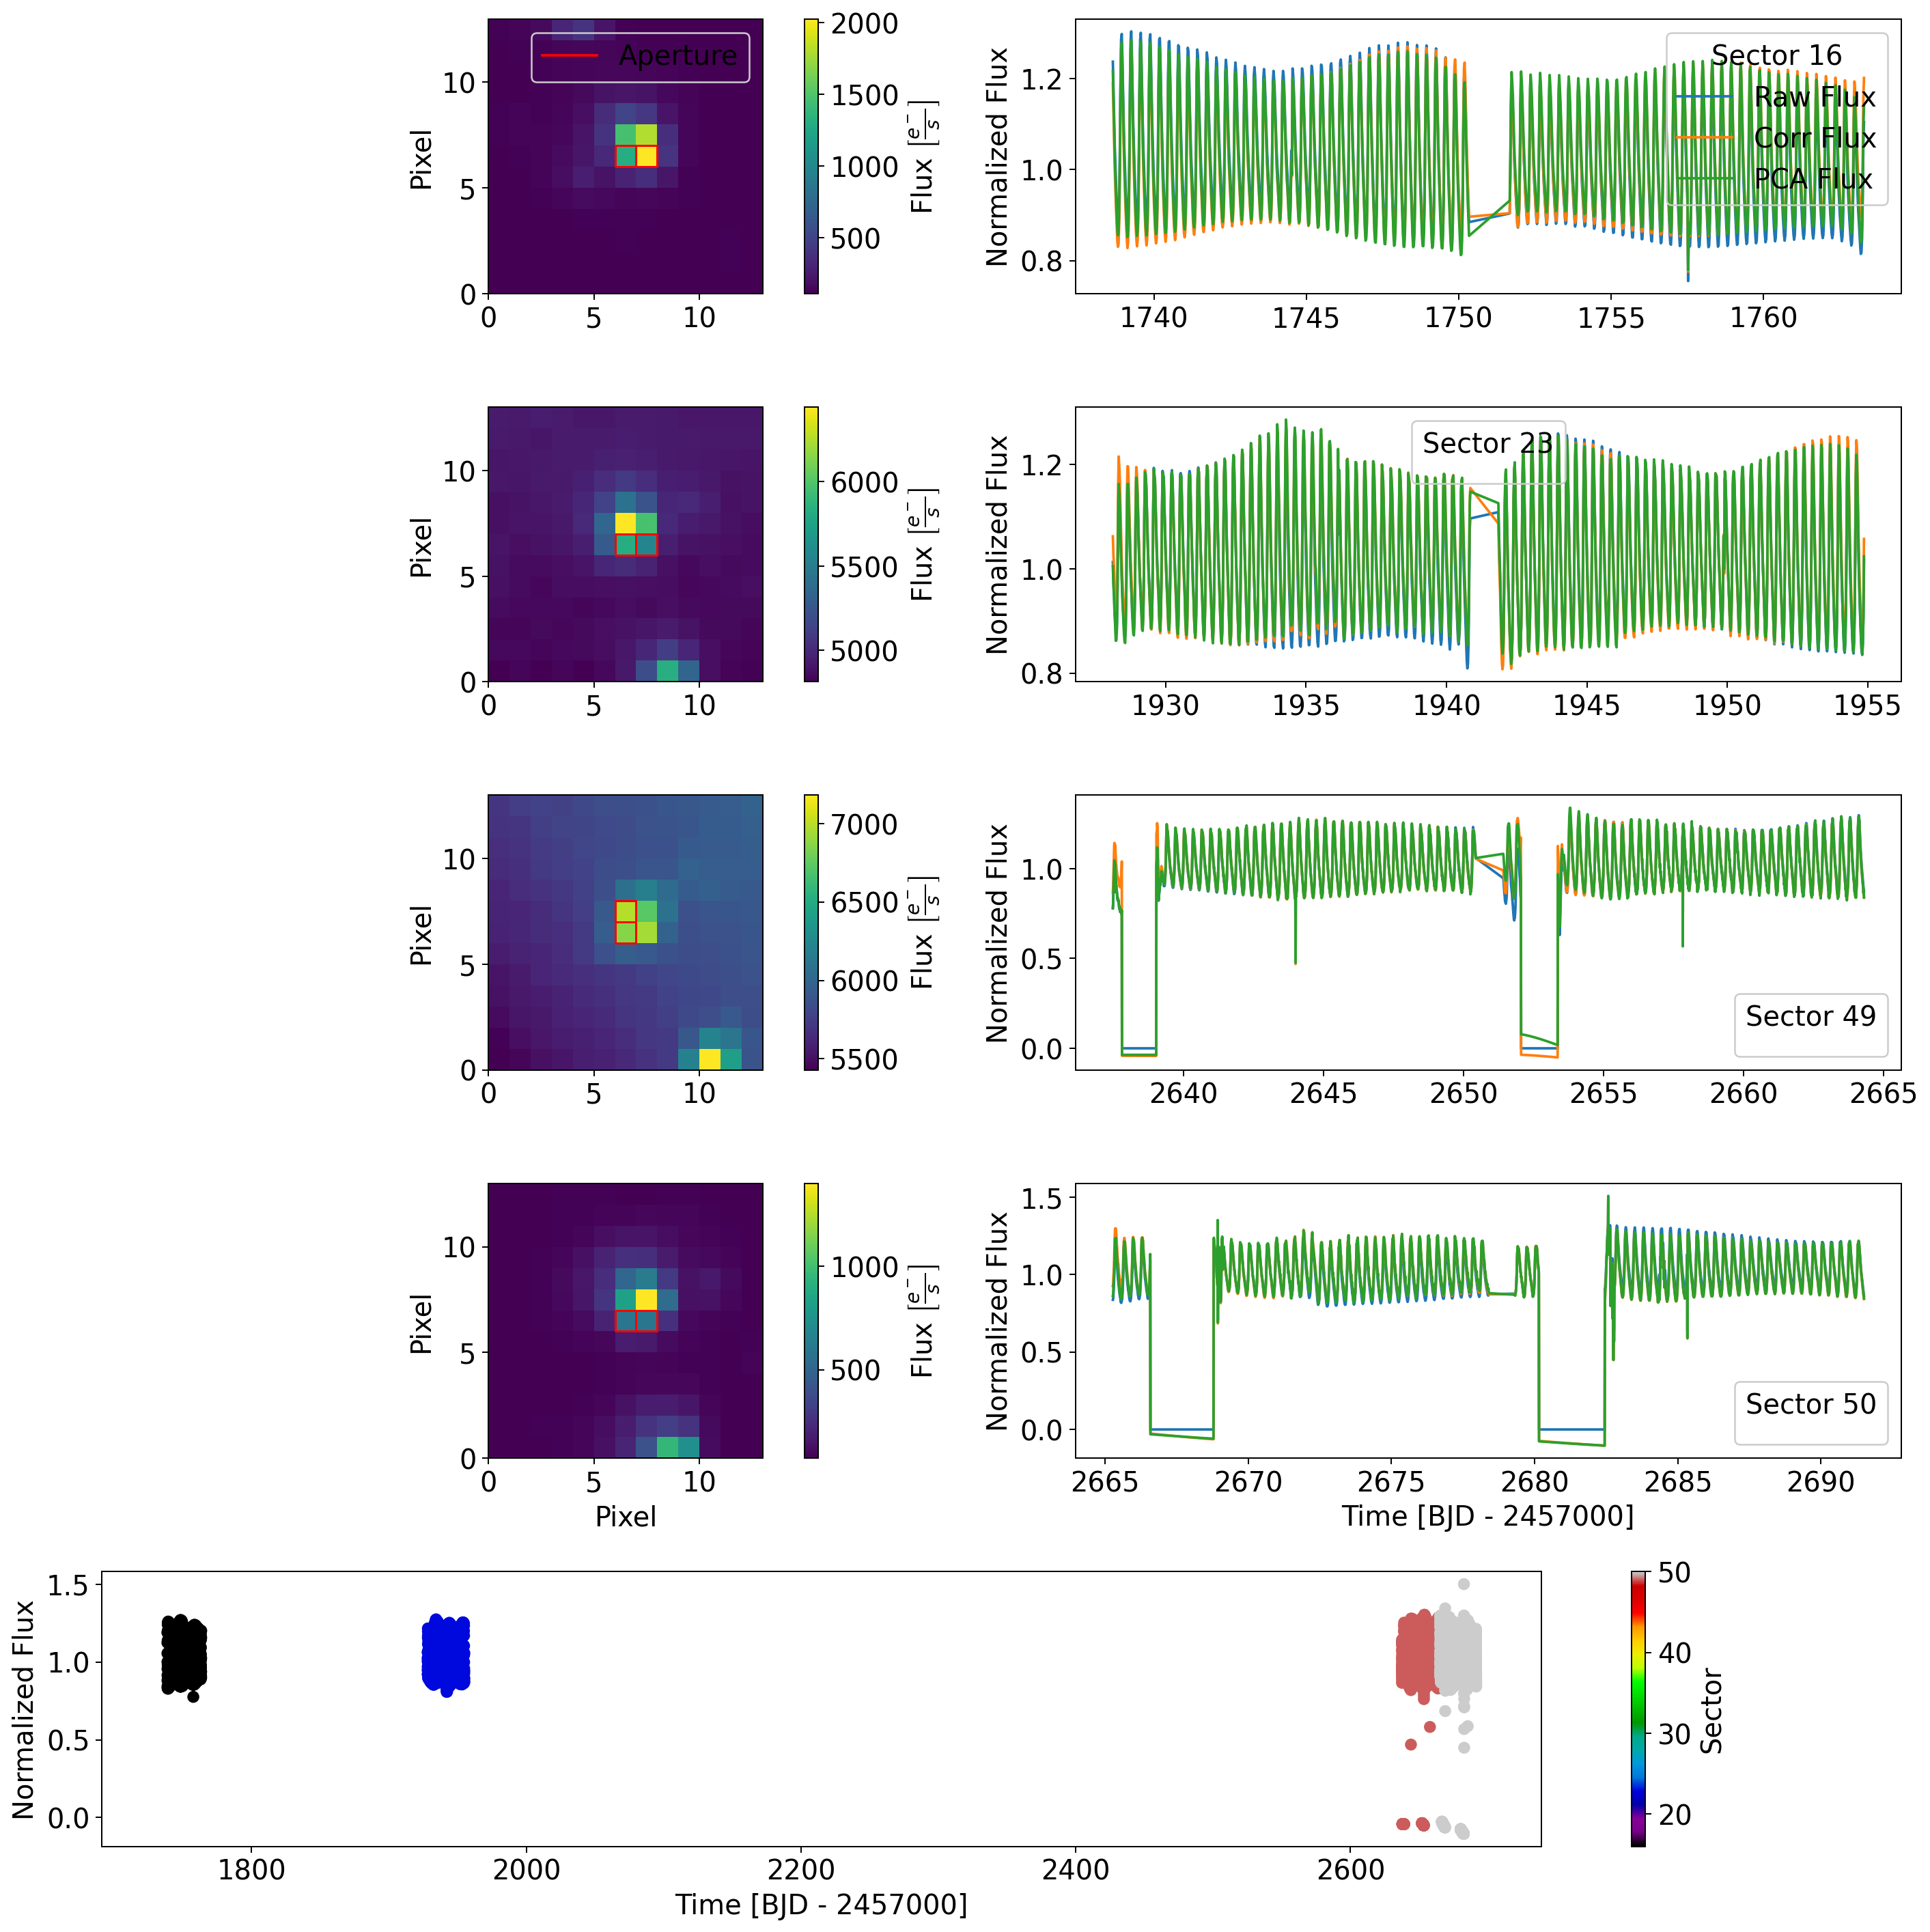

,tic,gaia,ra,dec,sector,tess_mag,aperture_size,chip,camera
0,122447138,2101103743584479744,290.455968,40.145733,41,10.2283,8.898438,3,2
1,122447138,2101103743584479744,290.455968,40.145733,54,10.2283,5.000000,2,3
2,122447138,2101103743584479744,290.455968,40.145733,55,10.2283,4.908739,1,3


In [6]:
t2plot = 2
fig, axs = EDI.plot_result(
    lcs=lcs[t2plot],
    tpfs=tpfs[t2plot],
    aperture_masks=aperture_masks[t2plot],
)

plt.show()

display(pd.DataFrame(metas[0]))

# GaiaDatabaseInterface

GaiaDatabaseInterface(
    gaia_class=Created TAP+ (v20200428.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443,
    verbose=0,
)


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


dict_keys(['EPOCH_PHOTOMETRY-Gaia DR3 1492230556717187456.xml', 'EPOCH_PHOTOMETRY-Gaia DR3 2125982599343482624.xml', 'MCMC_GSPPHOT-Gaia DR3 2125982599343482624.xml'])
Index(['source_id', 'transit_id', 'band', 'time', 'mag', 'flux', 'flux_error',
       'flux_over_error', 'rejected_by_photometry', 'rejected_by_variability',
       'other_flags', 'solution_id', 'flux_normalized'],
      dtype='object')
band
G     73
BP    73
RP    73
Name: count, dtype: int64
1.0


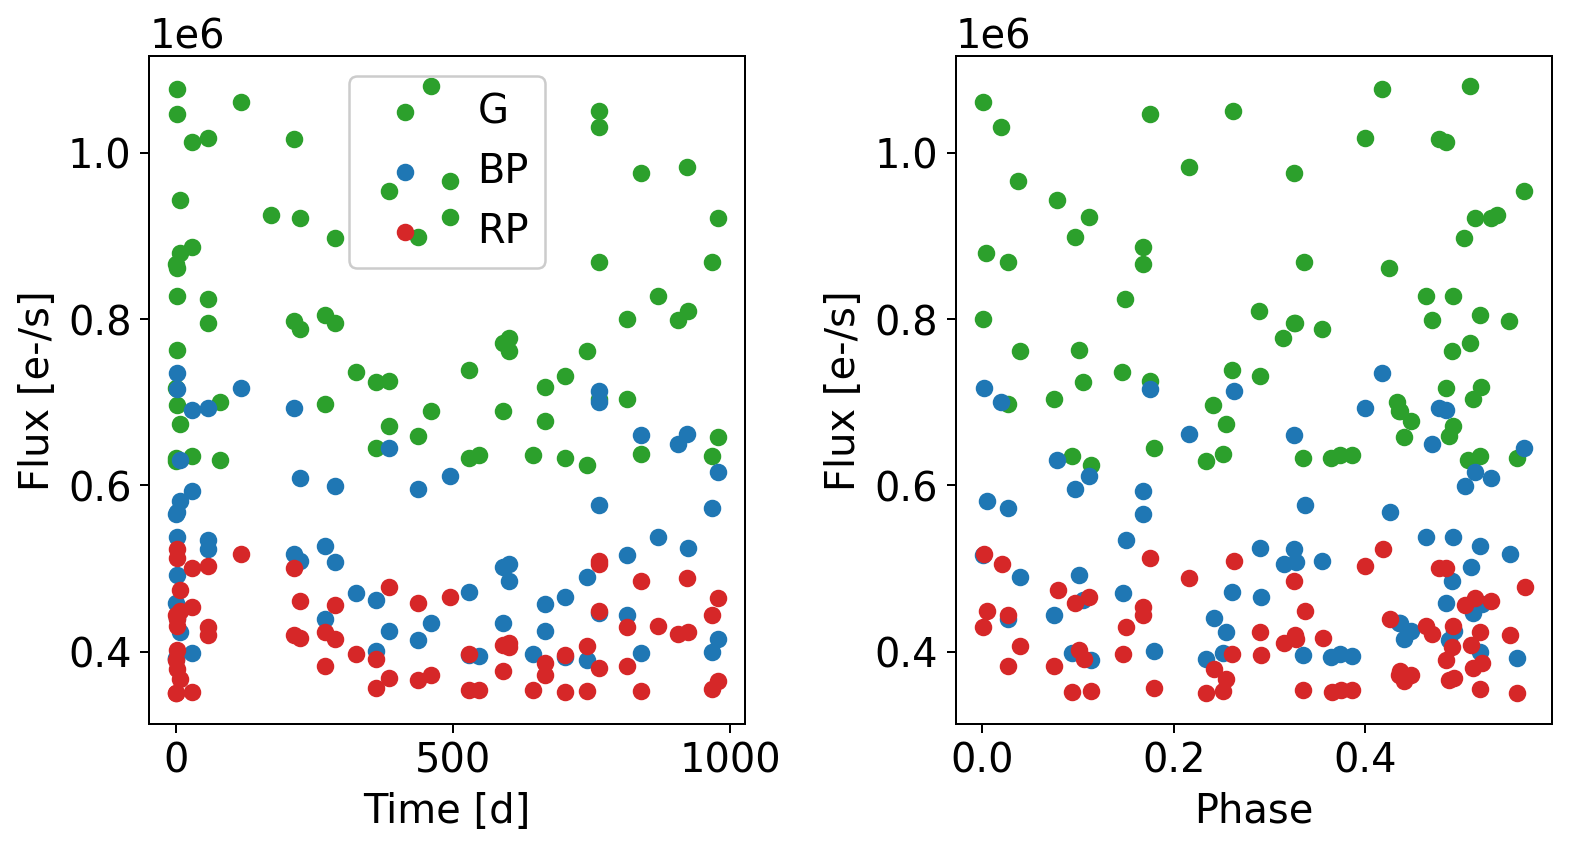

In [7]:
importlib.reload(aldigi)

GDI = aldigi.GaiaDatabaseInterface(
    gaia_class=Gaia,
    verbose=0
)
print(GDI)


# filter = "(jobs['phase'] == 'ERROR')"
# GDI.remove_all_jobs(pd_filter=filter, login_before=False, logout_after=False)


# print(df_ids.keys)
res = GDI.get_datalink(
    ids=df_ids_sep['id_gaiadr3'],
    normfunc=lambda x, df: x/np.nanmedian(x),
    retrieval_type=['EPOCH_PHOTOMETRY','MCMC_GSPPHOT'],
    # retrieval_type=['ALL'],
    n_chunks=2,
    load_data_kwargs=dict(
        data_release='Gaia DR3',
        format='votable',
    ),
    save_kwargs=dict(directory='../_data/')
)



df = res[list(res.keys())[0]]
print(res.keys())

print(df.columns)


print(df['band'].value_counts())

df['phase'] = df['time']%0.56666
df['time'] -= df['time'].min()

print(df.query('band=="G"')['flux_normalized'].median())

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(*df.query('band=="G"')[[ 'time', 'flux']].values.T, c='tab:green', label='G')
ax1.scatter(*df.query('band=="BP"')[['time', 'flux']].values.T, c='tab:blue',  label='BP')
ax1.scatter(*df.query('band=="RP"')[['time', 'flux']].values.T, c='tab:red',   label='RP')
ax2.scatter(*df.query('band=="G"')[[ 'phase','flux']].values.T, c='tab:green', label='G')
ax2.scatter(*df.query('band=="BP"')[['phase','flux']].values.T, c='tab:blue',  label='BP')
ax2.scatter(*df.query('band=="RP"')[['phase','flux']].values.T, c='tab:red',   label='RP')

ax1.set_xlabel('Time [d]')
ax2.set_xlabel('Phase')
ax1.set_ylabel('Flux [e-/s]')
ax2.set_ylabel('Flux [e-/s]')
ax1.legend()


# print(res)


# Utility Functions

In [8]:
importlib.reload(aldidu)

df = pd.DataFrame(data={
    'id':[
        4295806720, 38655544960, 343597448960,
        549755818112, 828929527040, 1275606125952,
        1340029955712, 1374389600384, 1619203481984,
        1653563247744, 2199023259904, 2546916445184,
        2851858288640, 2920577765120, 2989297243776,
        3062312520192, 3332894779520, 3371550165888,
    ]
}, dtype=int)
query = f"""
    SELECT ut.*, sh.Source
    FROM tap_upload.upload_table AS ut INNER JOIN
        "I/354/starhorse2021" AS sh
            ON ut.id = sh.Source
"""


tap = TapPlus(
    url='http://tapvizier.cds.unistra.fr/TAPVizieR/tap',
    tap_context=None,
    verbose=True,
)

df_res = aldidu.query_upload_table(
    tap=tap, query=query,
    df_upload=df,
    upload_table_name='upload_table',
    query_async=False,  #no asynchronous query needed, as table is small
    nsplits=3,
    verbose=2,
    parallel_kwargs=dict(n_jobs=3, verbose=3),
    launch_job_kwargs=dict(verbose=False),
)

df_res

Created TAP+ (v20200428.1) - Connection:
	Host: tapvizier.cds.unistra.fr
	Use HTTPS: False
	Port: 80
	SSL Port: 443


/home/lukas/venvs/astroLuSt/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


INFO(query_upload_table): Extracting split 1/3 (len(split): 6)
INFO(query_upload_table): Extracting split 2/3 (len(split): 6)
INFO(query_upload_table): Extracting split 3/3 (len(split): 6)
    WARNING(query_upload_table): HTTPError when extracting split #1/3, hence ignoring. Error 500: Impossible to create the uploaded table: TAP_UPLOAD.upload_table_1730750192589!


[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    6.2s finished


,id,Source
0,1340029955712,1340029955712
1,1374389600384,1374389600384
2,1619203481984,1619203481984
3,1653563247744,1653563247744
4,2199023259904,2199023259904
5,2546916445184,2546916445184
0,2851858288640,2851858288640
1,2920577765120,2920577765120
2,2989297243776,2989297243776
3,3062312520192,3062312520192
